# Scikit Learn: step 1
## Challenge: Boston house prices

In [1]:
#!pip install --upgrade scikit-learn==0.23.0

#### PASO 1: Obtener el dataset puro y correr el modelo de vecinos más cercanos

In [2]:
from sklearn.datasets import load_boston # función para obtener el dataset
from sklearn.neighbors import KNeighborsRegressor # objeto modelo de vecinos más cercanos
import matplotlib.pyplot as plt

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Obtención de dos arrays, uno con la información de las variables y otro con el precio de las viviendas
X_features, y_prices = load_boston(return_X_y= True)

In [5]:
# Instancio el objeto model
model = KNeighborsRegressor()

In [6]:
# Entrenamiento del modelo con mis datos crudos
model_fit = model.fit(X_features, y_prices)

In [7]:
# Obtención de las predicciones
predictions = model_fit.predict(X_features)

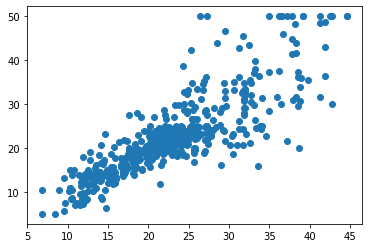

In [8]:
# Grafico de dispersión: comparación entre valores reales y predichos
plt.scatter(predictions, y_prices)

#### PASO 2: Realizar un preprocesamiento al dataset anterior y luego correr el modelo de vecinos más cercanos

In [9]:
from sklearn.preprocessing import StandardScaler # herramientas para preprocesamiento
from sklearn.pipeline import Pipeline # objeto pipeline para concatenar procesos

In [10]:
# Obtención de dos arrays, uno con la información de las variables y otro con el precio de las viviendas
X_features, y_prices = load_boston(return_X_y= True)

In [11]:
# Creo un pipeline para que primero se estandaricen los datos y luego corra el modelo
pipe = Pipeline([
    ("scale", StandardScaler()), # lleva paréntesis porque debo pasarle el objeto no la clase StandardScaler
    ("model", KNeighborsRegressor()),
])

In [12]:
# Entreno el modelo con mis datos pre-procesados ejecutando el pipeline creado
pipe_fit = pipe.fit(X_features, y_prices)

In [13]:
# Obtención de las predicciones
predictions_2 = pipe_fit.predict(X_features)

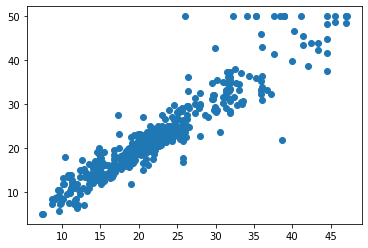

In [14]:
# Grafico de dispersión: comparación entre valores reales y predichos
plt.scatter(predictions_2, y_prices)

#### PASO 3: Profundizar el análisis
* Dividir el dataset anterior en dos sets (entrenamiento y validación) y luego correr el modelo de vecinos más cercanos
* Instanciar el objeto GridSerch para setear el número de vecinos más cercanos y un análisis de validación cruzada

In [15]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [16]:
# Obtención de dos arrays, uno con la información de las variables y otro con el precio de las viviendas
X_features, y_prices = load_boston(return_X_y= True)

In [17]:
# Creo un pipeline para que primero se estandaricen los datos y luego corra el modelo
pipe = Pipeline([
    ("scale", StandardScaler()), # lleva paréntesis porque debo pasarle el objeto no la clase StandardScaler
    ("model", KNeighborsRegressor()),
])

In [18]:
# Reviso los parámetros que puedo incluir dentro de mi grilla en "param_grid"
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [19]:
# Instancio el objeto GridSearchCV y especifico los parámetros que quiero ajustar
model_grid = GridSearchCV(estimator = pipe,
                          param_grid = {'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}, # cantidad de vecinos cercanos
                          cv = 3 # sets para validación cruzada (cross validation)
                         )

In [20]:
# Entreno los modelos diseñados con GridSearch
model_grid_fit = model_grid.fit(X_features, y_prices)

In [21]:
# Obtengo las estadísticas de todos los modelos creados y probados con GridSearch
# El modelo con menor "rank_test_score" será el mejor modelo logrado, en este caso el que tiene 'model__n_neighbors'= 3
pd.DataFrame(model_grid_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003326,0.000937,0.005333,0.000474,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.002666,0.000471,0.004000,0.000818,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.003002,0.000002,0.004000,0.000001,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.002663,0.000471,0.004333,0.000468,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002663,0.000470,0.004334,0.000470,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.002636,0.000451,0.003683,0.000450,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.002011,0.000020,0.004333,0.000471,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.002669,0.000477,0.003997,0.000816,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.002335,0.000472,0.004331,0.000938,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.002017,0.000029,0.004329,0.000466,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [23]:
# Obtención de las predicciones
predictions_3 = model_grid_fit.predict(X_features)

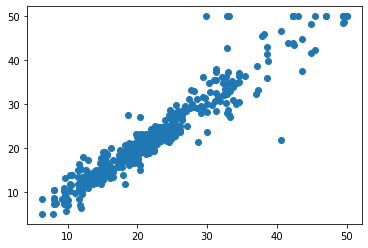

In [24]:
# Grafico de dispersión: comparación entre valores reales y predichos
plt.scatter(predictions_3, y_prices)

### NOTA: Con los ejercicios anteriores se puede observar que no basta con correr solamente un modelo sobre una base de datos. Para obtener un buen modelo en necesario:
* Entender bien el problema,
* Analizar que variables se incluyen y tomar deciciones sobre si es conveniente mantenerlas a todas o no,
* Realizar un proceso de reingeniería de variables,
* Reescalar las variables y buscar el mejor modelo con GridSearch y Cross Validation,
* Probar y ajustar los diferentes hiperparámetros que permita el modelo,
* Finalemente ejecutar el modelo y obtener las predicciones.